Laboratorium 1

In [1]:
import torch
from torch import nn
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [3]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [6]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
learning_rate = 1e-3
batch_size = 128
epochs = 5

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306969  [   64/60000]
loss: 2.290747  [ 6464/60000]
loss: 2.270691  [12864/60000]
loss: 2.272219  [19264/60000]
loss: 2.236538  [25664/60000]
loss: 2.218787  [32064/60000]
loss: 2.231092  [38464/60000]
loss: 2.188998  [44864/60000]
loss: 2.196923  [51264/60000]
loss: 2.165097  [57664/60000]
Test Error: 
 Accuracy: 43.3%, Avg loss: 2.152082 

Epoch 2
-------------------------------
loss: 2.163473  [   64/60000]
loss: 2.147645  [ 6464/60000]
loss: 2.091793  [12864/60000]
loss: 2.122557  [19264/60000]
loss: 2.044302  [25664/60000]
loss: 1.998368  [32064/60000]
loss: 2.037334  [38464/60000]
loss: 1.944357  [44864/60000]
loss: 1.970257  [51264/60000]
loss: 1.900545  [57664/60000]
Test Error: 
 Accuracy: 52.6%, Avg loss: 1.886978 

Epoch 3
-------------------------------
loss: 1.920459  [   64/60000]
loss: 1.883514  [ 6464/60000]
loss: 1.768470  [12864/60000]
loss: 1.827872  [19264/60000]
loss: 1.683682  [25664/60000]
loss: 1.652079  [32064/600

Zadanie 2

In [11]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [12]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 10),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [13]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1, weight_decay=1e-8)

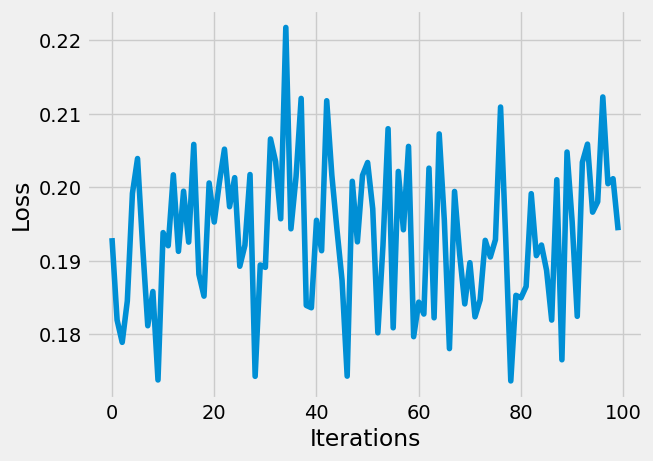

In [14]:
epochs = 1
outputs = []
losses = []
for epoch in range(epochs):
    for image, _ in loader:

        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss)
    outputs.append((epochs, image, reconstructed))

# Defining the Plot Style
plt.style.use("fivethirtyeight")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Plotting the last 100 values
plt.plot(torch.tensor(losses[-100:]).detach().numpy())

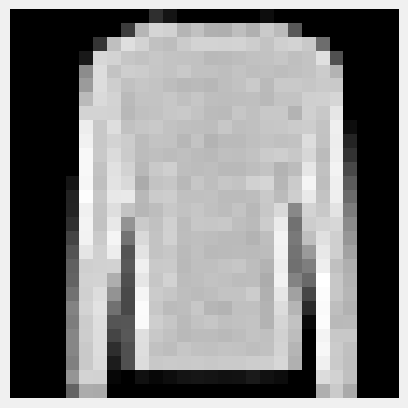

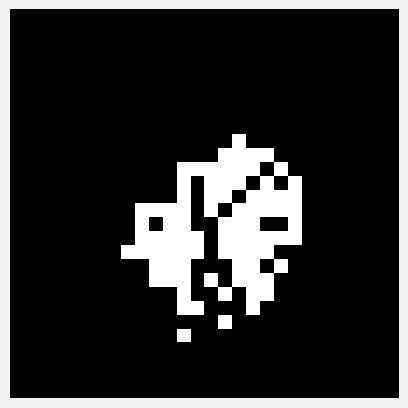

In [15]:
for i, item in enumerate(image):

    # Reshape the array for plotting
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0].detach().numpy(), "gray")
plt.axis("off")
plt.show()

for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0].detach().numpy(), "gray")
plt.axis("off")
plt.show()